In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
from sklearn.linear_model import LogisticRegressionCV
import pickle

train = pd.read_pickle("./data/010_train_woe.pkl")
#train.isnull().sum()
#train.columns

#### training 

In [3]:
lm = LogisticRegressionCV(penalty='elasticnet', 
                        Cs = 10,        # How many parameters to try. Can also be a vector with parameters to try.
                        cv = 3,     # How many CV folds to try. 3 or 5
                        fit_intercept = True, # a constant (intercept) should be added
                        class_weight = 'balanced', #  adjust weights inversely proportional to class frequencies 
                        random_state = 251417829,
                        max_iter = 500,  # Maximum iterations
                        verbose = 0,
                        solver = 'saga',  # How to optimize.
                        refit = True,    
                        l1_ratios = np.arange(0, 1.01, 0.2),  # used if penalty='elasticnet'
                        n_jobs = -1
                        )

In [4]:
temp = train[:]
y = temp['target']
X = temp.drop(columns=['target'])

In [5]:
lm.fit(X = X, y = y)

/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Zjxi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Zjxi/Library/Python/3.9/lib/python/sit

LogisticRegressionCV(class_weight='balanced', cv=3,
                     l1_ratios=array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                     max_iter=500, n_jobs=-1, penalty='elasticnet',
                     random_state=251417829, solver='saga')

In [6]:
coef_df = pd.concat([pd.DataFrame({'column': train.columns[1:]}),
                    pd.DataFrame(np.transpose(lm.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,upbPctChange_woe,0.453000
1,maturityDate_woe,0.486516
2,occupancyStatus_woe,0.896860
3,originalLoanToValue_woe,0.205185
4,propertyType_woe,0.440173
5,propertyValuationMethod_woe,0.184812
6,nonPmts_3m_woe,0.668484
7,estimatedLoanToValue_woe,0.816268
8,loanAge_woe,1.131237
9,originalDebtToIncomeRatio_woe,0.591004


In [7]:
lm.intercept_

array([0.08477632])

In [9]:
print(lm.l1_ratio_)
print(lm.C_)

[0.4]
[1291.54966501]


In [108]:
# save the model to disk
import pickle
pickle.dump(lm, open('fitted_model.sav', 'wb'))

#### evaluate on a test set

In [10]:
test = pd.read_pickle("./data/011_test_woe.pkl")
test.head()

,target,creditScore_woe,firstTimeHomebuyerFlag_woe,originalDebtToIncomeRatio_woe,firstPaymentDate_woe,currentActualUpb_woe,propertyState_woe,originalUpb_woe,loanAge_woe,miCancellationIndicator_woe,...,mortgageInsurancePct_woe,currentInterestRate_woe,originalLoanTerm_woe,propertyType_woe,upbPctChange_woe,maturityDate_woe,nonPmts_3m_woe,loanPurpose_woe,remainingMonthsToLegalMaturity_woe,originalLoanToValue_woe
3,0,0.243703,-0.230913,-0.923512,0.914414,-0.246671,-0.362608,-0.293348,0.781824,1.076377,...,-0.357003,1.136875,0.14583,-0.261624,-1.706176,1.017115,-1.474355,-0.480342,0.881992,-0.146579
4,0,0.243703,-0.230913,-0.923512,0.914414,-0.246671,-0.362608,-0.293348,0.781824,1.076377,...,-0.357003,1.136875,0.14583,-0.261624,-1.706176,1.017115,-1.474355,-0.480342,0.881992,-0.146579
13,0,0.243703,-0.230913,-0.923512,0.914414,-0.246671,-0.362608,-0.293348,0.781824,1.076377,...,-0.357003,1.136875,0.14583,-0.261624,-1.706176,1.017115,-1.474355,-0.480342,0.881992,-0.146579
14,0,0.243703,-0.230913,-0.923512,0.914414,-0.246671,-0.362608,-0.293348,0.781824,1.076377,...,-0.357003,1.136875,0.14583,-0.261624,-1.706176,1.017115,-1.474355,-0.480342,0.881992,-0.146579
16,0,0.243703,-0.230913,-0.923512,0.914414,-0.246671,-0.362608,-0.293348,0.781824,1.076377,...,-0.357003,1.136875,0.14583,-0.261624,-1.706176,1.017115,-1.474355,-0.480342,0.881992,-0.146579


In [11]:
test.isnull().sum()

target                                0
creditScore_woe                       0
firstTimeHomebuyerFlag_woe            0
originalDebtToIncomeRatio_woe         0
firstPaymentDate_woe                  0
currentActualUpb_woe                  0
propertyState_woe                     0
originalUpb_woe                       0
loanAge_woe                           0
miCancellationIndicator_woe           0
occupancyStatus_woe                   0
numberOfBorrowers_woe                 0
propertyValuationMethod_woe           0
estimatedLoanToValue_woe              0
mortgageInsurancePct_woe              0
currentInterestRate_woe               0
originalLoanTerm_woe                  0
propertyType_woe                      0
upbPctChange_woe                      0
maturityDate_woe                      0
nonPmts_3m_woe                        0
loanPurpose_woe                       0
remainingMonthsToLegalMaturity_woe    0
originalLoanToValue_woe               0
dtype: int64

In [12]:
train.columns

Index(['target', 'upbPctChange_woe', 'maturityDate_woe', 'occupancyStatus_woe',
       'originalLoanToValue_woe', 'propertyType_woe',
       'propertyValuationMethod_woe', 'nonPmts_3m_woe',
       'estimatedLoanToValue_woe', 'loanAge_woe',
       'originalDebtToIncomeRatio_woe', 'numberOfBorrowers_woe',
       'firstPaymentDate_woe', 'originalUpb_woe', 'currentInterestRate_woe',
       'originalLoanTerm_woe', 'creditScore_woe',
       'miCancellationIndicator_woe', 'currentActualUpb_woe',
       'mortgageInsurancePct_woe', 'remainingMonthsToLegalMaturity_woe',
       'loanPurpose_woe', 'propertyState_woe', 'firstTimeHomebuyerFlag_woe'],
      dtype='object')

In [13]:
test.columns

Index(['target', 'creditScore_woe', 'firstTimeHomebuyerFlag_woe',
       'originalDebtToIncomeRatio_woe', 'firstPaymentDate_woe',
       'currentActualUpb_woe', 'propertyState_woe', 'originalUpb_woe',
       'loanAge_woe', 'miCancellationIndicator_woe', 'occupancyStatus_woe',
       'numberOfBorrowers_woe', 'propertyValuationMethod_woe',
       'estimatedLoanToValue_woe', 'mortgageInsurancePct_woe',
       'currentInterestRate_woe', 'originalLoanTerm_woe', 'propertyType_woe',
       'upbPctChange_woe', 'maturityDate_woe', 'nonPmts_3m_woe',
       'loanPurpose_woe', 'remainingMonthsToLegalMaturity_woe',
       'originalLoanToValue_woe'],
      dtype='object')

In [14]:
test = test[train.columns]

In [ ]:
pred_class = lm.predict(test.iloc[:, 1:])
pred_prob = lm.predict_proba(test.iloc[:, 1:])
print(pred_class[0:5], '\n', pred_prob[0:5])   # the second column is P(target=1)

[0 0 0 0 0] 
 [[0.73738138 0.26261862]
 [0.78631628 0.21368372]
 [0.78631628 0.21368372]
 [0.78631628 0.21368372]
 [0.82318822 0.17681178]]


In [19]:
with open('./result/020_pred_class.pkl', 'wb') as f:
    pickle.dump(pred_class, f)
with open('./result/020_pred_prob.pkl', 'wb') as f:
    pickle.dump(pred_prob, f)

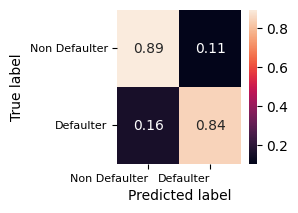

In [20]:
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
confusion_matrix_cs = confusion_matrix(y_true = test['target'],
                                        y_pred = pred_class)


# turn matrix to percentages
confusion_matrix_cs = confusion_matrix_cs.astype('float') / confusion_matrix_cs.sum(axis=1)[:, np.newaxis]

# turn to a dataframe
df_cm = pd.DataFrame(
        confusion_matrix_cs, index=['Non Defaulter', 'Defaulter'],
        columns=['Non Defaulter', 'Defaulter']
        )

# Create image
fig = plt.figure(figsize=(2, 2))
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2f')

# adjust the plotting params
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,
                             ha='right', fontsize=8)

# Add labels
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [21]:
from sklearn.metrics import roc_auc_score

# Calculate bootstrap
pred = pd.DataFrame({'classes': test['target'],
                      'probs': pred_prob[:, 1]}) # the second column is predicted default prob 
auc_boot = []
testsetsize = len(test)
for i in np.arange(3000):
  sample = pred.sample(n = testsetsize, replace=True)
  auc_boot.append(roc_auc_score(sample['classes'], sample['probs']))

# Calculate differences
auc_total = roc_auc_score(pred['classes'], pred['probs'])
diff = auc_boot - auc_total

# Calculate percentile
lower = np.percentile(diff, 2.5)
upper = np.percentile(diff, 97.5)
ci = auc_total - upper, auc_total - lower

print(f'The 95% bootstrap confidence interval for the AUC is {ci}')

The 95% bootstrap confidence interval for the AUC is (0.9396039333250291, 0.9436447925065017)


#### cutoff point based on expected profit using OOT

##### a bit evalutaion

In [22]:
oot_woe = pd.read_pickle('./data/012_oot_woe.pkl')
oot_woe.head()

,target,occupancyStatus_woe,mortgageInsurancePct_woe,currentInterestRate_woe,firstTimeHomebuyerFlag_woe,nonPmts_3m_woe,creditScore_woe,originalLoanTerm_woe,numberOfBorrowers_woe,originalLoanToValue_woe,...,propertyValuationMethod_woe,miCancellationIndicator_woe,originalDebtToIncomeRatio_woe,loanPurpose_woe,remainingMonthsToLegalMaturity_woe,firstPaymentDate_woe,propertyState_woe,originalUpb_woe,propertyType_woe,estimatedLoanToValue_woe
1908,1,0.050082,-0.357003,1.136875,-0.230913,2.577330,1.049741,0.145830,0.371297,0.462834,...,0.727529,1.076377,0.292155,-0.480342,-1.051984,0.914414,0.609031,-0.293348,0.075908,0.002212
2043,1,0.050082,1.076423,1.136875,-0.230913,2.577330,1.049741,0.145830,0.371297,1.253385,...,0.727529,1.076377,0.292155,-0.480342,-1.051984,0.914414,0.609031,0.453772,0.075908,0.377895
11980,0,-0.518279,-0.357003,0.373073,-0.230913,-1.474355,-1.274056,-0.732154,0.371297,-0.146579,...,0.727529,1.076377,-0.335823,0.404697,-0.140859,0.914414,0.609031,1.040642,0.075908,0.002212
18494,0,0.050082,-0.357003,0.373073,-0.230913,-1.474355,0.243703,-0.732154,-0.720390,-0.916417,...,0.727529,1.076377,-0.335823,-0.133258,-0.140859,0.914414,0.609031,0.453772,0.075908,0.002212
20877,0,0.050082,-0.357003,1.136875,-0.230913,-1.474355,1.049741,-0.380230,0.371297,1.253385,...,0.727529,1.076377,0.292155,-0.480342,-0.140859,0.914414,-0.143293,0.115428,0.075908,0.002212


In [23]:
oot_woe.isnull().sum()

target                                0
occupancyStatus_woe                   0
mortgageInsurancePct_woe              0
currentInterestRate_woe               0
firstTimeHomebuyerFlag_woe            0
nonPmts_3m_woe                        0
creditScore_woe                       0
originalLoanTerm_woe                  0
numberOfBorrowers_woe                 0
originalLoanToValue_woe               0
currentActualUpb_woe                  0
upbPctChange_woe                      0
maturityDate_woe                      0
loanAge_woe                           0
propertyValuationMethod_woe           0
miCancellationIndicator_woe           0
originalDebtToIncomeRatio_woe         0
loanPurpose_woe                       0
remainingMonthsToLegalMaturity_woe    0
firstPaymentDate_woe                  0
propertyState_woe                     0
originalUpb_woe                       0
propertyType_woe                      0
estimatedLoanToValue_woe              0
dtype: int64

In [24]:
oot_woe.columns

Index(['target', 'occupancyStatus_woe', 'mortgageInsurancePct_woe',
       'currentInterestRate_woe', 'firstTimeHomebuyerFlag_woe',
       'nonPmts_3m_woe', 'creditScore_woe', 'originalLoanTerm_woe',
       'numberOfBorrowers_woe', 'originalLoanToValue_woe',
       'currentActualUpb_woe', 'upbPctChange_woe', 'maturityDate_woe',
       'loanAge_woe', 'propertyValuationMethod_woe',
       'miCancellationIndicator_woe', 'originalDebtToIncomeRatio_woe',
       'loanPurpose_woe', 'remainingMonthsToLegalMaturity_woe',
       'firstPaymentDate_woe', 'propertyState_woe', 'originalUpb_woe',
       'propertyType_woe', 'estimatedLoanToValue_woe'],
      dtype='object')

In [25]:
oot_woe = oot_woe[train.columns]

In [26]:
pred_class2 = lm.predict(oot_woe.iloc[:, 1:])
pred_prob2 = lm.predict_proba(oot_woe.iloc[:, 1:])
print(pred_class2[0:5], '\n', pred_prob2[0:5])  # the second column is P(target=1)

[1 1 0 0 1] 
 [[0.01215126 0.98784874]
 [0.00497546 0.99502454]
 [0.79860649 0.20139351]
 [0.7736296  0.2263704 ]
 [0.23618574 0.76381426]]


In [27]:
with open('./result/020_pred_class2.pkl', 'wb') as f:
    pickle.dump(pred_class2, f)
with open('./result/020_pred_prob2.pkl', 'wb') as f:
    pickle.dump(pred_prob2, f)

In [43]:
roc_auc_score(oot_woe['target'], pred_prob2[:, 1])

0.9924804873405673

##### cutoff

In [28]:
oot = pd.read_pickle('./data/012_oot_cleaned.pkl')

In [29]:
new = pd.DataFrame({
    'loanSqeNumber': oot['loanSequenceNumber'],
    'month': oot['monthlyReportingPeriod'],
    'originalUpb': oot['originalUpb'],
    'profitMargin': 0.30 * oot['currentInterestRate'] * oot['originalUpb'],
    'loss': 0.40 * oot['originalUpb'] / (oot['estimatedLoanToValue']/ 100),
    'pred_prob': pred_prob2[:, 1]
})

new['expectedProfit'] = (1 - new['pred_prob'])*new['profitMargin'] - new['pred_prob']*new['loss']

In [30]:
new.head()

,loanSqeNumber,month,originalUpb,profitMargin,loss,pred_prob,expectedProfit
1908,F14Q10051313,202406,272000,367200.0,201481.481481,0.987849,-194571.283940
2043,F14Q10057262,202406,146000,208050.0,66363.636364,0.995025,-64998.303254
11980,F14Q20067577,202406,35000,40687.5,28571.428571,0.201394,26739.201120
18494,F14Q20222407,202406,124000,144150.0,101224.489796,0.226370,88604.477626
20877,F14Q20281568,202406,160000,234000.0,130612.244898,0.763814,-44496.032217


In [31]:
cutoffs = np.linspace(0.1, 1, 20)
totProfits = []

for c in cutoffs:
    accepted = new[new['pred_prob'] < c]  # if default prob < c, accept the loan
    totProfits.append(accepted['expectedProfit'].sum())

t = pd.DataFrame({
    'cutoff': cutoffs,
    'totProfit': totProfits
})

t

,cutoff,totProfit
0,0.100000,4.999183e+07
1,0.147368,5.538158e+07
2,0.194737,5.725341e+07
3,0.242105,5.871961e+07
4,0.289474,5.925849e+07
5,0.336842,6.032153e+07
6,0.384211,6.051786e+07
7,0.431579,6.051786e+07
8,0.478947,6.078670e+07
9,0.526316,6.087102e+07


In [57]:
cutoff_best = cutoffs[np.argmax(totProfits)]
print(cutoff_best)

0.5263157894736842


Thus the best cutoff is 0.5263 (row 9)

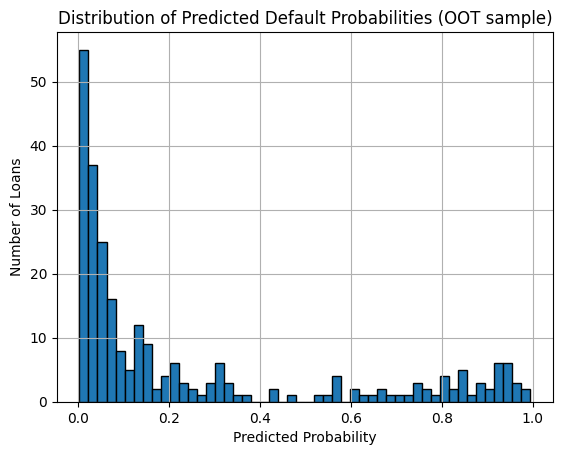

In [33]:
plt.hist(new['pred_prob'], bins=50, edgecolor='black')
plt.title('Distribution of Predicted Default Probabilities (OOT sample)')
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Loans')
plt.grid(True)
plt.show()